In [30]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')

from maroc_data_new_tboard import MarocData

from functools import partial
from collections import Counter
from operator import add
from functools import reduce
from scipy.stats import norm

input_dat = '../data/Run000137944.dat'
marocdata = MarocData(input_dat)

y_offset = [12000, 10000, 8000, 4000, 2000]

In [31]:
marocdata.check_clean_ts()

Timestamps of board 27 have been fixed
Timestamps of board 28 have been fixed
Timestamps of board 29 have been fixed


In [32]:
marocdata.fix_p1(debug=False)

In [33]:
all_boards = np.arange(1, 31)
non_active = [b for b in all_boards if b not in marocdata.active_boards]
print("Boards {} not in this file".format(non_active))

Boards [17] not in this file


In [34]:
marocs = [(i, j) for i, j in zip(np.arange(0, 384, 64), np.arange(0, 384, 64)[1:])]


In [35]:
sigma=4
pedestals_tot = marocdata.pedestals_tot
noise_tot = marocdata.noise_tot(sigma)


In [36]:
from plot_run import board_plot, plot_event_ts_new, take_consecutive, over_threshold_per_board

In [37]:
ts_over_threshold = over_threshold_per_board(marocdata, pedestals_tot, noise_tot)

all_ts = reduce(add, ts_over_threshold.values())
no_hits = 3
ts_to_plot = [ts for ts, occ in Counter(all_ts).items() if occ >= no_hits]


Plotting TS: 2499876022


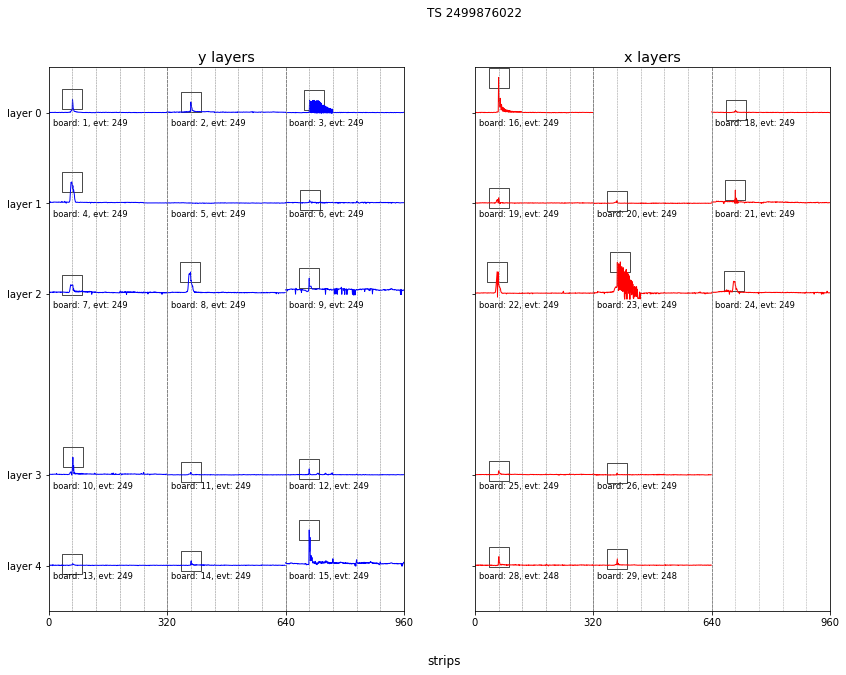

Plotting TS: 234036444


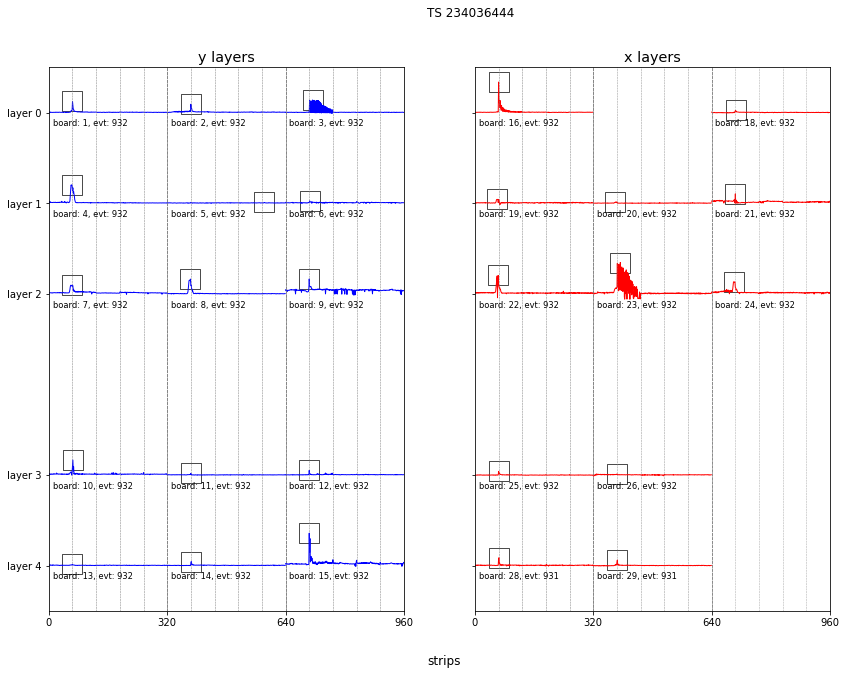

Plotting TS: 205670175


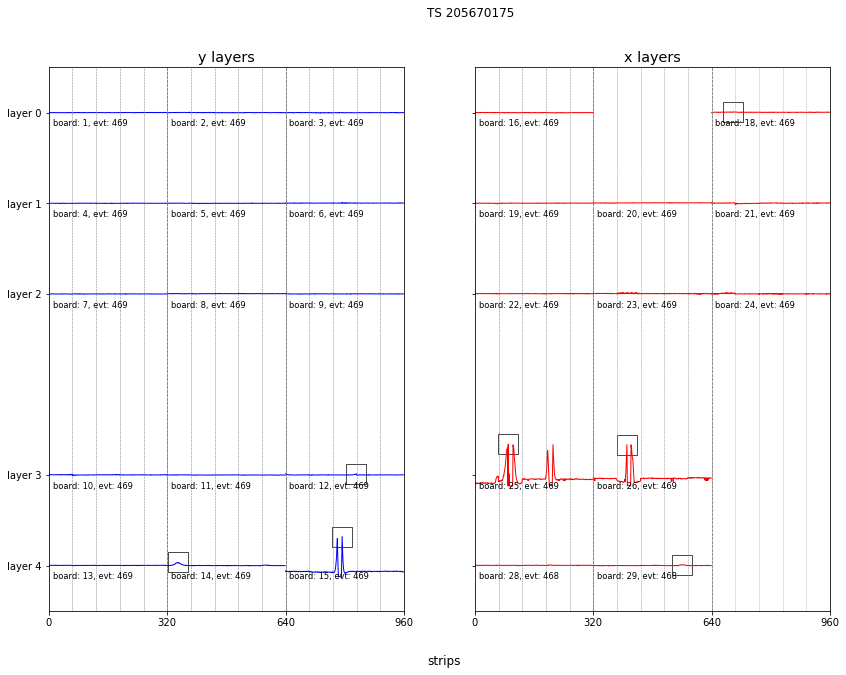

In [38]:
if len(ts_to_plot) > 0:
    for ts in ts_to_plot:
        fig, ax1, ax2 = plot_event_ts_new(ts, marocdata, pedestals_tot, noise_tot)
        plt.show()

In [39]:
b=4
e= 249

In [40]:
evt = e+marocdata.get_board(b).reference_event.evt_id

In [41]:
ped = marocdata.get_board(b).avg_data

In [42]:
def reorder_marocs(signal, marocs, reorder_map=[0, 3, 1, -2, -2]) -> np.ndarray:
        reordered_array = np.zeros(signal.shape[0])
        for m, (a, b) in enumerate(marocs):
            reordered_array[a + reorder_map[m] * 64 : b + reorder_map[m] * 64] = signal[
                a:b
            ]
        return reordered_array

In [43]:
reordered_signal = reorder_marocs(marocdata.get_board(b).get_event(evt).signal, marocs)

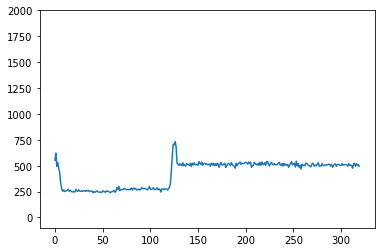

In [15]:
plt.plot(np.arange(320), marocdata.get_board(b).get_event(evt).signal)
#plt.plot(np.arange(320), reordered_signal)
plt.ylim(-100,2000)
plt.show()

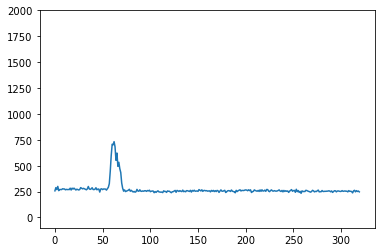

In [16]:
plt.plot(np.arange(320), marocdata.get_board(b).signals[evt])
plt.ylim(-100,2000)
plt.show()

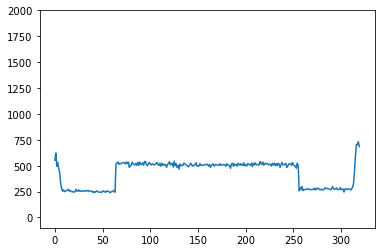

In [17]:
#plt.plot(np.arange(320), marocdata.get_board(13).get_event(evt).signal)
plt.plot(np.arange(320), reordered_signal)
plt.ylim(-100,2000)
plt.show()

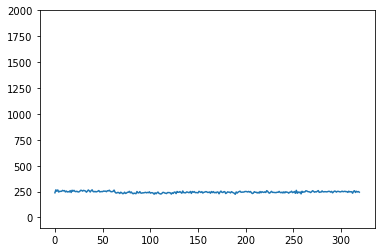

In [18]:
plt.plot(np.arange(320), ped)
plt.ylim(-100,2000)
plt.show()

In [ ]:
plt.plot(np.arange(320), reordered_signal-ped)
plt.ylim(-200,2000)
plt.show()

In [ ]:
plt.plot(np.arange(320), marocdata.get_board(b).signals[evt]-marocdata.pedestals_tot[b])
plt.ylim(-100,2000)
plt.show()

In [ ]:
test_signal = marocdata.get_board(b).signals[evt]-marocdata.pedestals_tot[b]

In [ ]:
test_signal_new = np.zeros(test_signal.shape[0])

In [ ]:
test_signal_new[:320-64]=test_signal[64:]

In [ ]:
test_signal_new[320-64:]=test_signal[:64]

In [ ]:
plt.plot(np.arange(320), test_signal_new)
plt.ylim(-100,2000)
plt.show()

In [ ]:
plt.plot(np.arange(320), marocdata.get_board(b).get_event(evt).signal)
#plt.plot(np.arange(320), reordered_signal)
plt.ylim(-100,2000)
plt.show()

In [ ]:
test_signal_no_reord = marocdata.get_board(b).get_event(evt).signal

In [ ]:
test_signal_no_reord_new = np.zeros(test_signal_no_reord.shape[0])

In [ ]:
test_signal_no_reord_new[:64]=test_signal_no_reord[64:128]

In [ ]:
test_signal_no_reord_new[64:128]=test_signal_no_reord[:64]

In [ ]:
test_signal_no_reord_new[128:] = test_signal_no_reord[128:]

In [ ]:
plt.plot(np.arange(320), test_signal_no_reord_new)
plt.ylim(-100,2000)
plt.show()